Нормализация признаков для улучшения производительности градиентного спуска

In [69]:
def normalize_features(X):
    mean = sum(X) / len(X)
    std_dev = (1/len(X) * sum([ (x - mean) ** 2 for x in X])) ** 0.5
    return [(x - mean) / std_dev for x in X]

Предсказание стоимости страховки на основе признаков и параметров модели

In [70]:
def predict(X, theta):
    return sum([X[i]*theta[i] for i in range(len(theta))])


Вычисление функции стоимости для линейной регрессии

In [71]:
def compute_cost(X, y, theta):
    return sum([(predict(X[i], theta) - y[i]) ** 2 for i in range(len(y))]) / (2*len(y))

Выполнение градиентного спуска для оптимизации параметров модели

In [72]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    for _ in range(num_iters):
        temp = theta
        for j in range(len(temp)):
            temp[j] = theta[j] - (alpha/m) * sum([(predict(X[i], theta) - y[i]) * X[i][j] for i in range(m)])
        theta = temp
    return theta

In [73]:
data = [line.strip().split(',') for line in open('insurance - insurance.csv', 'r')][1:]  
X = [[1] + line[:-1] for line in data]  
y = [float(line[-1]) for line in data]

In [74]:
regions = ['northeast', 'southeast', 'southwest', 'northwest']
for i in range(len(X)):
    X[i][1] = float(X[i][1])  
    X[i][2] = 1.0 if X[i][2] == 'female' else 0.0  
    X[i][3] = float(X[i][3])  
    X[i][4] = float(X[i][4])  
    X[i][5] = 1.0 if X[i][5] == 'yes' else 0.0  
    
    if X[i][6] not in regions:
        X[i][6] = regions[0]  
        
    X[i][6] = float(regions.index(X[i][6]))

for j in [1, 3, 4, 6]: 
    col = [X[i][j] for i in range(len(X))]
    col = normalize_features(col)
    for i in range(len(X)):
        X[i][j] = col[i]

In [75]:
theta = [0 for _ in range(len(X[0]))]
theta = gradient_descent(X, y, theta, alpha=0.01, num_iters=1000)

print('Параметры модели:', theta)

Параметры модели: [9349.029585681295, 3566.156279828737, 32.31665664996903, 1968.6975198080288, 598.3441213026492, 19549.333906679407, -198.73731205323512]


In [76]:
import matplotlib.pyplot as plt

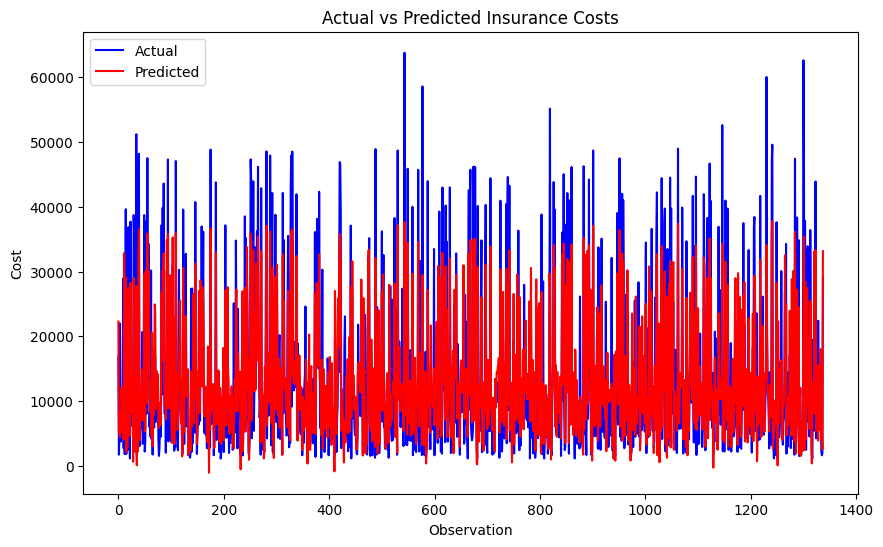

In [77]:
predictions = [predict(X[i], theta) for i in range(len(X))]

plt.figure(figsize=(10, 6))
plt.plot(range(len(y)), y, color='blue', label='Actual')
plt.plot(range(len(y)), predictions, color='red', label='Predicted')
plt.title('Actual vs Predicted Insurance Costs')
plt.xlabel('Observation')
plt.ylabel('Cost')
plt.legend()
plt.show()